## Objectives
1. Use Pandas methods to work with missing data
2. Convert columns from one data type to another
3. Create histograms and scatter plots

## Exercises
We will again use the PGA Stats CSV file that we used in Week 1 as well as previously in the course. Run the following code cell to import the libraries that we will use in this lab. Note, we have added the statement `%matplotlib inline` which is an IPython magic command that tells Jupyter Notebook to render Matplotlib plots inline rather than as part of an output. You can read more [here](https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb).

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the Data
We are again going to use the PGA Stats dataset.

**Q1.1.** Read the CSV file to a DataFrame named `pga` and specify the index as the player's name. Remember, the file must be in the same directory as this Jupyter Notebook or you must specify the entire file path. Inspect the first five rows.

In [4]:
### BEGIN SOLUTION
pga = pd.read_csv('PGA Stats.csv', index_col = 1)
pga.head()
### END SOLUTION

,RK,AGE,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS,CUP POINTS,EARNINGS
PLAYER,,,,,,,,,
Justin Thomas,1,25,23,82,21,10,3,"1,610","$8,694,821.00"
Dustin Johnson,2,34,20,74,19,12,3,"2,056","$8,457,352.00"
Justin Rose,3,38,18,66,17,11,2,"2,260","$8,130,678.00"
Bryson DeChambeau,4,25,26,93,22,9,3,"2,188","$8,094,489.00"
Brooks Koepka,5,28,17,62,15,6,2,"1,093","$7,094,047.00"


In [ ]:
# DO NOT EDIT
if pga is None:
    raise NameError("Did not name your DataFrame correctly")
### BEGIN HIDDEN TESTS
test_df = pd.read_csv('PGA Stats.csv', index_col = 1)
pd.testing.assert_frame_equal(_, test_df.head())
pd.testing.assert_frame_equal(pga, test_df)
### END HIDDEN TESTS

**Q1.2.** Next, summarize the data to understand the types of data and some summary statistics for numeric columns.

In [5]:
### BEGIN SOLUTION
pga.info()
pga.describe()
### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, Justin Thomas to Len Mattiace
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RK          559 non-null    int64 
 1   AGE         559 non-null    object
 2   EVENTS      559 non-null    int64 
 3   ROUNDS      559 non-null    int64 
 4   CUTS MADE   559 non-null    int64 
 5   TOP 10      559 non-null    int64 
 6   WINS        559 non-null    int64 
 7   CUP POINTS  559 non-null    object
 8   EARNINGS    559 non-null    object
dtypes: int64(6), object(3)
memory usage: 43.7+ KB


,RK,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS
count,559.000000,559.000000,559.000000,559.000000,559.00000,559.000000
mean,196.518784,10.651163,26.398927,6.257603,1.01610,0.087657
std,80.134134,10.916839,37.230225,7.526168,1.92552,0.375564
min,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,140.500000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,254.000000,4.000000,0.000000,2.000000,0.00000,0.000000
75%,254.000000,22.000000,66.500000,13.000000,1.00000,0.000000
max,254.000000,32.000000,107.000000,25.000000,12.00000,3.000000


Do any of the summary statistics for `RK` make sense? Why are `AGE`, `CUP POINTS`, and `EARNINGS` not represented in the summary statistics?

**Q1.3.** It may not be obvious from the output of `head`, but `CUP POINTS` and `EARNINGS` have commas and dollar signs which make it unclear for Python to determine the appropriate computational data type. As a result, it stores them as a generic object. However, it is not as obvious why `AGE` is not numeric. To understand why, inspect the last five rows of the data set using the `tail` method.

In [6]:
### BEGIN SOLUTION
pga.tail()
### END SOLUTION

,RK,AGE,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS,CUP POINTS,EARNINGS
PLAYER,,,,,,,,,
Tony Romo,254,--,1,2,0,0,0,0,--
Peter Jacobsen,254,64,1,3,0,0,0,0,--
Guy Boros,254,54,1,2,0,0,0,0,--
Lee Janzen,254,54,1,3,0,0,0,0,--
Len Mattiace,254,51,1,2,0,0,0,0,--


In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_df.tail())
### END HIDDEN TESTS

In this dataset, there are '--' representing either unknown quantities, a zero, or a not applicable designation. Ideally, we would speak with the owner of the data to clarify how each of these are encoded. In reality, this is often not possible and the same value may be used to encode all three different cases. Often, we must infer how to handle these types of values based on the data. For this exercise, we will encode those values with NaN (not a number) values.

**Q1.4.** In the below cell, again read the 'PGA Stats.csv' file to a DataFrame named `pga`, but specify '--' as the argument to the `na_values` parameter. This parameter will convert '--' occurences to an NaN. There are many other parameters for the `read_csv` function in order to handle a variety of issues with data files. You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

After creating the DataFrame, use the `info` and `describe` methods to note the differences. What computational data type is the `AGE` column and how many non-null elements are there? What are the summary statistics?

In [7]:
### BEGIN SOLUTION
pga = pd.read_csv('PGA Stats.csv', index_col=1, na_values='--')
pga.info()
pga.describe()
### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, Justin Thomas to Len Mattiace
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RK          559 non-null    int64  
 1   AGE         403 non-null    float64
 2   EVENTS      559 non-null    int64  
 3   ROUNDS      559 non-null    int64  
 4   CUTS MADE   559 non-null    int64  
 5   TOP 10      559 non-null    int64  
 6   WINS        559 non-null    int64  
 7   CUP POINTS  559 non-null    object 
 8   EARNINGS    253 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 43.7+ KB


,RK,AGE,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS
count,559.000000,403.000000,559.000000,559.000000,559.000000,559.00000,559.000000
mean,196.518784,35.414392,10.651163,26.398927,6.257603,1.01610,0.087657
std,80.134134,8.481146,10.916839,37.230225,7.526168,1.92552,0.375564
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,140.500000,29.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,254.000000,35.000000,4.000000,0.000000,2.000000,0.00000,0.000000
75%,254.000000,41.000000,22.000000,66.500000,13.000000,1.00000,0.000000
max,254.000000,67.000000,32.000000,107.000000,25.000000,12.00000,3.000000


In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_df = pd.read_csv('PGA Stats.csv', index_col = 1, na_values='--')
pd.testing.assert_frame_equal(pga, test_df)
### END HIDDEN TESTS

Run the cell below. It is removing the dollar signs and commas and then converting the column to a float so that we can analyze it. **Note: the `replace` method used below is a string method which is why we access the `str` attribute first. This is different than the `replace` method from the reading.**

The statement that is commented out is equivalent to the first two statements. It is using regular expressions (regex) to replace dollar signs and commas with blanks and then converting it to a float. Regular expressions are outside the scope of this class.

In [8]:
pga['EARNINGS'] = pga['EARNINGS'].str.replace('$','')
pga['EARNINGS'] = pga['EARNINGS'].str.replace(',','').astype(float)
# pga['EARNINGS'] = pga['EARNINGS'].replace('[\$,]','', regex = True).astype(float)
pga.head()

,RK,AGE,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS,CUP POINTS,EARNINGS
PLAYER,,,,,,,,,
Justin Thomas,1,25.0,23,82,21,10,3,"1,610",8694821.0
Dustin Johnson,2,34.0,20,74,19,12,3,"2,056",8457352.0
Justin Rose,3,38.0,18,66,17,11,2,"2,260",8130678.0
Bryson DeChambeau,4,25.0,26,93,22,9,3,"2,188",8094489.0
Brooks Koepka,5,28.0,17,62,15,6,2,"1,093",7094047.0


### 2. Missing Values
Now that we have translated '--' to NaN values and removed dollar signs and commas, all of our data should be numeric. However, there are still several missing values in the AGE and EARNINGS columns.

**Q2.1.** In the below cell, create an ordered list using Markdown to list at least two strategies to deal with the missing data.

**Q2.2.** We will assume that a missing value in the EARNINGS column means that they did not earn any money. Fill these missing values with zeros.

In [13]:
### BEGIN SOLUTION
pga['EARNINGS'] = pga.EARNINGS.fillna(0)
pga.info()
### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, Justin Thomas to Len Mattiace
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RK          559 non-null    int64  
 1   AGE         403 non-null    float64
 2   EVENTS      559 non-null    int64  
 3   ROUNDS      559 non-null    int64  
 4   CUTS MADE   559 non-null    int64  
 5   TOP 10      559 non-null    int64  
 6   WINS        559 non-null    int64  
 7   CUP POINTS  559 non-null    object 
 8   EARNINGS    559 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 43.7+ KB


In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_df['EARNINGS'] = test_df['EARNINGS'].replace('[\$,]','', regex = True).astype(float)
test_df['EARNINGS'] = test_df.EARNINGS.fillna(0)
pd.testing.assert_series_equal(pga.EARNINGS, test_df.EARNINGS)
### END HIDDEN TESTS

**Q2.3.** For the missing values in the AGE column, it is less clear what to do. We know that there are 156 players with an unknown age and we know that the DataFrame is sorted from top ranked to worst ranked players. In the below cell, inspect the first 10 players with an unknown age.

In [15]:
### BEGIN SOLUTION
pga.loc[pd.isnull(pga.AGE)].head(10)
### END SOLUTION

,RK,AGE,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS,CUP POINTS,EARNINGS
PLAYER,,,,,,,,,
Benjamin Silverman,129,NaN,28,84,17,2,0,323,793140.0
Jonathan Randolph,162,NaN,25,65,11,1,0,0,453328.0
Ethan Tracy,175,NaN,23,68,12,0,0,0,364493.0
Zac Blair,178,NaN,20,58,11,0,0,0,330507.0
Brett Stegmaier,180,NaN,21,61,12,0,0,0,305607.0
Nate Lashley,183,NaN,17,47,8,0,0,0,296650.0
Rob Oppenheim,185,NaN,26,68,11,0,0,0,279019.0
Zecheng Dou,213,NaN,23,49,4,0,0,0,90993.0
Brandon Hagy,218,NaN,3,0,2,0,0,0,76817.0


In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_df.loc[pd.isnull(test_df.AGE)].head(10))
### END HIDDEN TESTS

It turns out that there are some well known and successful players with an unknown age. Poor Benjamin Silverman won nearly $800K and ESPN can't track down his age. We will leave players with an unknown age as an NaN value.

### 3. Plotting
**Q3.1.** Create a histogram of the number of events to understand the distribution. First, use the default number of bins to get an idea of the frequency of events played. Then, use the `bins` parameter to customize the size of the bins in order to get more granularity. How many values can EVENTS take on? What argument value makes sense in this case?

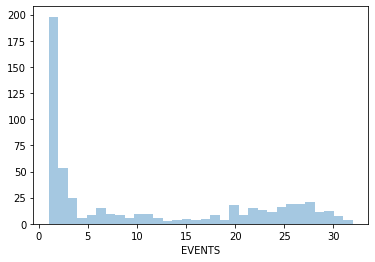

In [12]:
### BEGIN SOLUTION
sns.distplot(pga.EVENTS, kde=False, bins=32)
plt.show()
### END SOLUTION

There are many players in the dataset, like Tony Romo, who only play in a single tournament based on sponsor's exemptions. As you can see, only 403 of 559 players have a recorded age and only 253 players earned money. 

**Q3.2.** Next, subset the data to those players who played in at least three events. Name the resulting DataFrame `pga_pros`. Use the `describe` method to view the summary statistics of each numeric column. 

In [16]:
### BEGIN SOLUTION
pga_pros = pga.loc[pga.EVENTS > 2]
pga_pros.describe()
### END SOLUTION

,RK,AGE,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS,EARNINGS
count,308.00000,281.000000,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,149.87987,34.665480,18.344156,47.792208,10.974026,1.831169,0.159091,1.121141e+06
std,82.50355,7.622466,9.178562,38.683410,7.278050,2.289489,0.494940,1.547037e+06
min,1.00000,20.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,77.75000,29.000000,9.750000,0.000000,3.750000,0.000000,0.000000,3.123050e+04
50%,154.50000,34.000000,21.000000,63.000000,12.000000,1.000000,0.000000,5.280700e+05
75%,232.25000,40.000000,26.000000,80.000000,17.000000,3.000000,0.000000,1.525054e+06
max,254.00000,55.000000,32.000000,107.000000,25.000000,12.000000,3.000000,8.694821e+06


In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_pros = test_df.loc[test_df.EVENTS > 2]
pd.testing.assert_frame_equal(pga_pros, test_pros)
### END HIDDEN TESTS

**Q3.3.** In the below cell, create a scatter plot with Events on the x-axis and Earnings on the y-axis. Specify the horizontal axis label with 'Events Played' and the vertical axis label with 'Earnings'. Notice how I specified the y-axis ticks with a minimum of 0, a maximum of 10 million, and an interval of 2 million and customized the tick labels so they appear as \\$0M, \\$2M, etc.

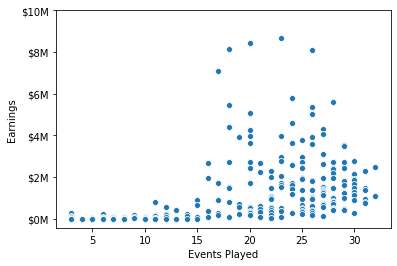

In [17]:
### BEGIN SOLUTION
sns.scatterplot(x='EVENTS', y='EARNINGS', data=pga_pros)
plt.xlabel('Events Played')
plt.ylabel('Earnings')
### END SOLUTION
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], ['$0M', '$2M', '$4M', '$6M', '$8M', '$10M'])
plt.show()